In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import ast
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.svm import LinearSVC
import torch

In [5]:

path = f'hidden_states/paired_testset_embeddings_{0}-{50}.csv'
df = pd.read_csv(path)
for i in range(50, 500, 50):
    path = f'hidden_states/paired_testset_embeddings_{i}-{i+50}.csv'
    temp = pd.read_csv(path)
    df = pd.concat([df, temp])

df

,Unnamed: 0,support,opposition,outcome,folder_id,case_path,data_type,support_mean_embeddings,support_first_embeddings,opposition_first_embeddings,opposition_mean_embeddings
0,0,['Case 9:11-cv-80416-KLR Document 737 Entered ...,['Case 9:11-cv-80416-KLR Document 743 Entered ...,deny,1013,/mnt/a536sing/sdl1/gvc-recap/1/gov.uscourts.fl...,train,"[[2.9199183238943087, 3.355921688891696, -0.84...","[[-1.6875, 0.51171875, -1.71875, 2.3125, -0.10...","[[-1.6875, 0.51171875, -1.71875, 2.3125, -0.10...","[[3.074567674122545, 3.114687157892118, -1.050..."
1,1,['IN THE UNITED STATES DISTRICT COURT\nFOR THE...,"['I i .\nt | | , : tl\n\n \n\n \n\n \n\n \n\n ...",deny,909,/mnt/a536sing/sdag1/gvc-recap/0/gov.uscourts.m...,train,"[[2.4045591442012766, 2.9918359641107544, -0.1...","[[-1.6875, 0.51171875, -1.71875, 2.3125, -0.10...","[[-1.6875, 0.51171875, -1.71875, 2.3125, -0.10...","[[2.3855743246506314, 2.708639955402726, -1.21..."
2,2,"[""Case 1:08-cv-11908-RWZ Document 27\n\nFiled ...",['Case 1:08-cv-11908-RWZ Document 29\n\nFiled ...,grant,507,/mnt/a536sing/sdg1/gvc-recap/6/gov.uscourts.ma...,train,"[[2.093125776399092, 2.3765899005614584, -1.37...","[[-1.6875, 0.51171875, -1.71875, 2.3125, -0.10...","[[-1.6875, 0.51171875, -1.71875, 2.3125, -0.10...","[[1.695646567081523, 2.4249613514952837, -0.89..."
3,3,['Case 1:11-cv-10802-WGY Document 13 Filed 06/...,['Case 1:11-cv-10802-WGY Document 21\n\nFiled ...,deny,158,/mnt/a536sing/sdc1/gvc-recap/3/gov.uscourts.ma...,test,"[[4.118529608640162, 2.1361552745372325, 0.257...","[[-1.6875, 0.51171875, -1.71875, 2.3125, -0.10...","[[-1.6875, 0.51171875, -1.71875, 2.3125, -0.10...","[[3.7049434945017192, 3.4614336281439004, -1.0..."
4,4,['10\n11\n12\n13\n14\n15\n16\n17\n18\n19\n20\n...,['Case 3:07-cv-05739-SC\n\n1\n2\n3\n4\n\nDocum...,deny,906,/mnt/a536sing/sdaa1/gvc-recap/8/gov.uscourts.c...,train,"[[2.826896250907953, 2.859579942025224, -1.030...","[[-1.6875, 0.51171875, -1.71875, 2.3125, -0.10...","[[-1.6875, 0.51171875, -1.71875, 2.3125, -0.10...","[[2.9036702480091905, 2.7970401371750877, -1.6..."
...,...,...,...,...,...,...,...,...,...,...,...
45,495,['Case 2:15-cr-00198-GZS Document 34 Filed 05/...,['Case 2:15-cr-00198-GZS Document 40 Filed 06/...,deny,636,/mnt/a536sing/sdal1/gvc-recap/5/gov.uscourts.m...,train,"[[3.6032170917602864, 4.437865639243351, -0.61...","[[-1.6875, 0.51171875, -1.71875, 2.3125, -0.10...","[[-1.6875, 0.51171875, -1.71875, 2.3125, -0.10...","[[3.8499574519674, 3.5468151730006303, -0.2596..."
46,496,[' \n\n \n\nCase 1:10-cv-00569-RJA-LGF Documen...,['Case 1:10-cv-00569-RJA-LGF Document 598 File...,deny,894,/mnt/a536sing/sdo1/gvc-recap/1/gov.uscourts.ny...,test,"[[2.193711323088739, 3.1933049794457595, -1.23...","[[-1.6875, 0.51171875, -1.71875, 2.3125, -0.10...","[[-1.6875, 0.51171875, -1.71875, 2.3125, -0.10...","[[3.165077249140219, 3.02601168680439, -0.8918..."
47,497,['Case 6:10-cv-00111-LED Document 325\n\nFiled...,['Case 6:10-cv-00111-LED Document 333\n\nFiled...,deny,621,/mnt/a536sing/sdh1/gvc-recap/9/gov.uscourts.tx...,test,"[[4.127839783173225, 3.27884864329649, -0.3562...","[[-1.6875, 0.51171875, -1.71875, 2.3125, -0.10...","[[-1.6875, 0.51171875, -1.71875, 2.3125, -0.10...","[[2.734606815526215, 2.5355846479721413, -1.08..."
48,498,"['Helio LLC v. Palm, Inc. Doc. 3\n\n \n\n \n\n...","['Helio LLC v. Palm, lnc.\n\n60373/2021440.1\n...",deny,574,/mnt/a536sing/sdc1/gvc-recap/2/gov.uscourts.ca...,train,"[[1.6816054850809905, 1.351619176500093, 0.567...","[[-1.6875, 0.51171875, -1.71875, 2.3125, -0.10...","[[-1.6875, 0.51171875, -1.71875, 2.3125, -0.10...","[[1.7267989111363713, 1.2854233714883134, 1.26..."


In [5]:
df

,Unnamed: 0,support,opposition,outcome,folder_id,case_path,data_type,support_embeddings,opposition_embeddings
0,0,['Case 9:11-cv-80416-KLR Document 737 Entered ...,['Case 9:11-cv-80416-KLR Document 743 Entered ...,deny,1013,/mnt/a536sing/sdl1/gvc-recap/1/gov.uscourts.fl...,train,[[-1.6875 0.51171875 -1.71875 ... -0.0...,[[-1.68750000e+00 5.11718750e-01 -1.71875000e...
1,1,['IN THE UNITED STATES DISTRICT COURT\nFOR THE...,"['I i .\nt | | , : tl\n\n \n\n \n\n \n\n \n\n ...",deny,909,/mnt/a536sing/sdag1/gvc-recap/0/gov.uscourts.m...,train,[[-1.6875 0.51171875 -1.71875 ... -0.0...,[[ -1.6875 0.51171875 -1.71875 ... ...
2,2,"[""Case 1:08-cv-11908-RWZ Document 27\n\nFiled ...",['Case 1:08-cv-11908-RWZ Document 29\n\nFiled ...,grant,507,/mnt/a536sing/sdg1/gvc-recap/6/gov.uscourts.ma...,train,[[-1.6875 0.51171875 -1.71875 ... -0.0...,[[-1.6875 0.51171875 -1.71875 ... -0.0...
3,3,['Case 1:11-cv-10802-WGY Document 13 Filed 06/...,['Case 1:11-cv-10802-WGY Document 21\n\nFiled ...,deny,158,/mnt/a536sing/sdc1/gvc-recap/3/gov.uscourts.ma...,test,[[-1.6875 0.51171875 -1.71875 ... -0.0...,[[-1.6875 0.51171875 -1.71875 ... -0.0...
4,4,['10\n11\n12\n13\n14\n15\n16\n17\n18\n19\n20\n...,['Case 3:07-cv-05739-SC\n\n1\n2\n3\n4\n\nDocum...,deny,906,/mnt/a536sing/sdaa1/gvc-recap/8/gov.uscourts.c...,train,[[-1.6875 0.51171875 -1.71875 ... -0.0...,[[-1.6875 0.51171875 -1.71875 ... -0.0...
...,...,...,...,...,...,...,...,...,...
45,495,['Case 2:15-cr-00198-GZS Document 34 Filed 05/...,['Case 2:15-cr-00198-GZS Document 40 Filed 06/...,deny,636,/mnt/a536sing/sdal1/gvc-recap/5/gov.uscourts.m...,train,[[-1.6875 0.51171875 -1.71875 ... -0.0...,[[-1.6875 0.51171875 -1.71875 ... -0.0...
46,496,[' \n\n \n\nCase 1:10-cv-00569-RJA-LGF Documen...,['Case 1:10-cv-00569-RJA-LGF Document 598 File...,deny,894,/mnt/a536sing/sdo1/gvc-recap/1/gov.uscourts.ny...,test,[[-1.6875 0.51171875 -1.71875 ... -0.0...,[[ -1.6875 0.51171875 -1.71875 ... ...
47,497,['Case 6:10-cv-00111-LED Document 325\n\nFiled...,['Case 6:10-cv-00111-LED Document 333\n\nFiled...,deny,621,/mnt/a536sing/sdh1/gvc-recap/9/gov.uscourts.tx...,test,[[-1.6875 0.51171875 -1.71875 ... -0.0...,[[ -1.6875 0.51171875 -1.71875 ... ...
48,498,"['Helio LLC v. Palm, Inc. Doc. 3\n\n \n\n \n\n...","['Helio LLC v. Palm, lnc.\n\n60373/2021440.1\n...",deny,574,/mnt/a536sing/sdc1/gvc-recap/2/gov.uscourts.ca...,train,[[-1.6875 0.51171875 -1.71875 ... -0.0...,[[-1.6875 0.51171875 -1.71875 ... -0.0...


### TFIDF

In [16]:
paired = pd.read_csv('openai_dataset/paired_testset.csv', index_col=0)

def getSingleBriefs(brief_type, paired=paired):
    supports_map = list(map( lambda x: ast.literal_eval(x) , paired[brief_type].to_list()))
    outcome_map = paired['outcome'].to_list()
    data_type_map = paired['data_type'].to_list()  
    data = []

    for index,documents in enumerate(supports_map):
        outcome = outcome_map[index]
        data_type = data_type_map[index]
        for document in documents: 
            data.append((document,outcome,data_type))

    return np.array(data, dtype=str)

def confusion_plot(true_labels, predicted_labels, classes, labels , normalize=False, title=None, cmap=plt.cm.Blues):

    plt.figure(figsize=(10, 10))
    matrix = confusion_matrix(true_labels, predicted_labels, labels=labels)

    sns.heatmap(matrix, cmap=cmap, annot=True,
                cbar = True, fmt=".1f",
                 xticklabels=classes["x"], 
                 yticklabels=classes["y"])
    class_names = ["No Match", "Match"]
    # Plot non-normalized confusion matri
    plt.xlabel("Predicted")
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()
    return matrix

# supports
    
support_data = getSingleBriefs('support')
oppose_data = getSingleBriefs('opposition')


In [30]:
support_x = support_data[:,0]
support_target = support_data[:,1]

train = support_data[:,2] == 'train'
test = support_data[:,2] == 'test'

support_train_x = support_x[train]
support_train_target = support_target[train]
support_test_x = support_x[test]
support_test_target = support_target[test]


count_vect = CountVectorizer()
count_vect = count_vect.fit(support_x)
support_train_counts = count_vect.transform(support_train_x)
support_test_counts = count_vect.transform(support_test_target)


labels = ["grant", "deny"]
classes = {"x": labels, "y": labels}

In [27]:
pipe = Pipeline([('count', CountVectorizer()),('tfid', TfidfTransformer())])
transformed_data = pipe.fit(support_x)
# tfid_train = pipe['tfid'].transform(support_train_x).toarray()
# tfid_test = pipe['tfid'].transform(support_test_x).toarray()

# #how to write numpy array to csv
# np.savetxt("tfid_train.csv", tfid_train, delimiter=",")
# np.savetxt("tfid_test.csv", tfid_test, delimiter=",")
count_train = transformed_data['count'].transform(support_train_x).toarray()

tfid_train = transformed_data['tfid'].transform(count_train).toarray()

count_test = transformed_data['count'].transform(support_test_x).toarray()

tfid_test = transformed_data['tfid'].transform(count_test).toarray()


# #how to write numpy array to csv
np.savetxt("tfid_train.csv", tfid_train, delimiter=",")
np.savetxt("tfid_test.csv", tfid_test, delimiter=",")



In [34]:
np.savetxt("support_train_target.csv", support_train_target, delimiter=",", fmt='%s')
np.savetxt("support_test_target.csv", support_test_target, delimiter=",", fmt='%s')

accuracy: 0.5631067961165048


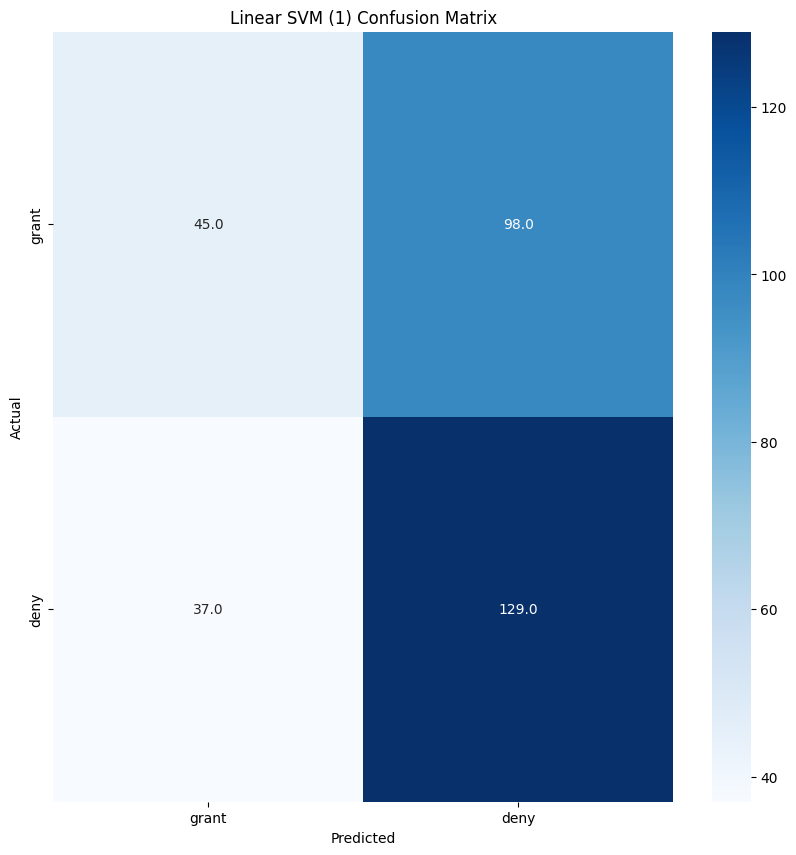

array([[ 45,  98],
       [ 37, 129]])

In [150]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)),
])

text_clf.fit(support_train_x, support_train_target)
predicted = text_clf.predict(support_test_x)
print(f"accuracy: {np.mean(predicted == support_test_target)}")

confusion_plot(support_test_target, predicted, classes, labels=labels, normalize=False, title="Linear SVM (1) Confusion Matrix")

accuracy: 0.56957928802589


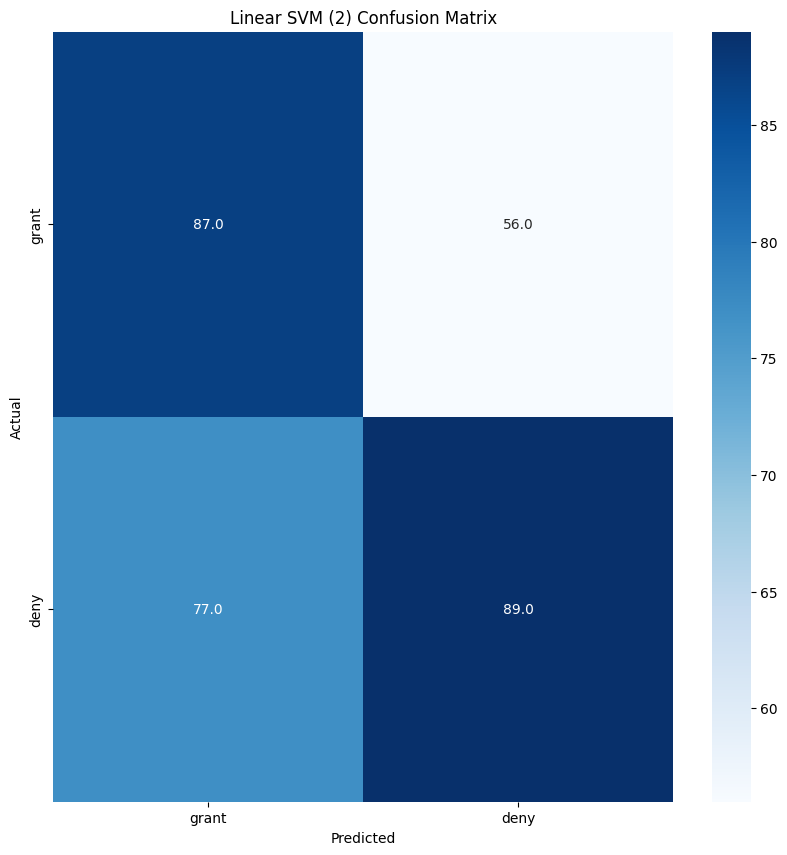

array([[87, 56],
       [77, 89]])

In [144]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC( random_state=42, tol=1e-5)),
])

text_clf.fit(support_train_x, support_train_target)
predicted = text_clf.predict(support_test_x)
print(f"accuracy: {np.mean(predicted == support_test_target)}")


confusion_plot(support_test_target, predicted, classes, labels=labels, normalize=False, title="Linear SVM (2) Confusion Matrix")

0.5275080906148867


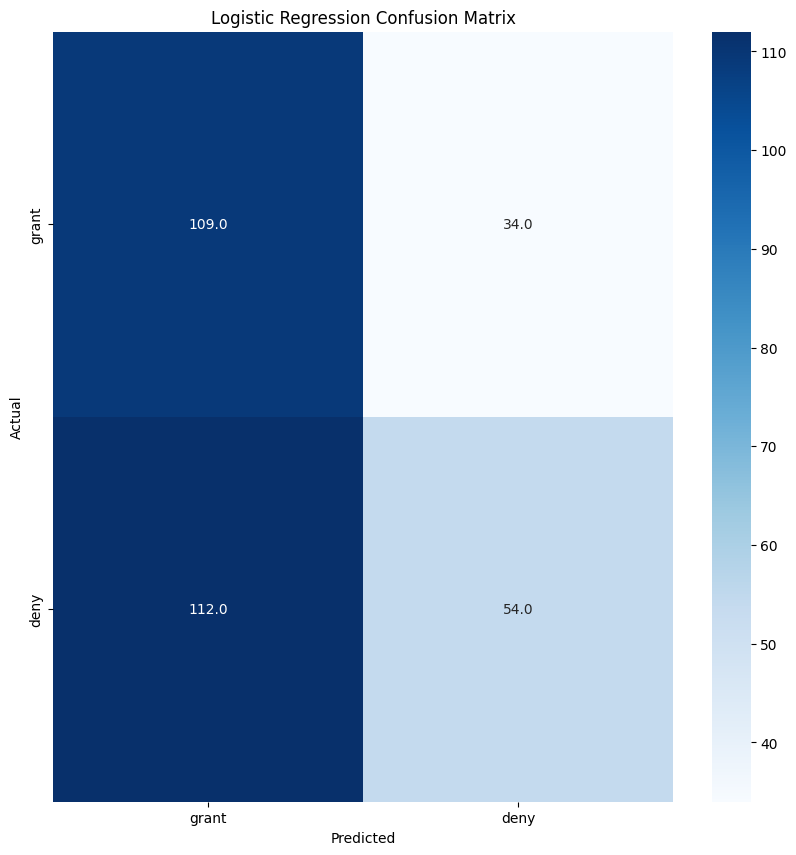

array([[109,  34],
       [112,  54]])

In [155]:

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('logistic',LogisticRegression(solver='liblinear')),
])

text_clf.fit(support_train_x, support_train_target)
predicted = text_clf.predict(support_test_x)
print(np.mean(predicted == support_test_target))
#print(f"probability: {text_clf.predict_proba(support_test_x)}")
confusion_plot(support_test_target, predicted, classes, labels=labels, normalize=False, title="Logistic Regression Confusion Matrix")

0.56957928802589


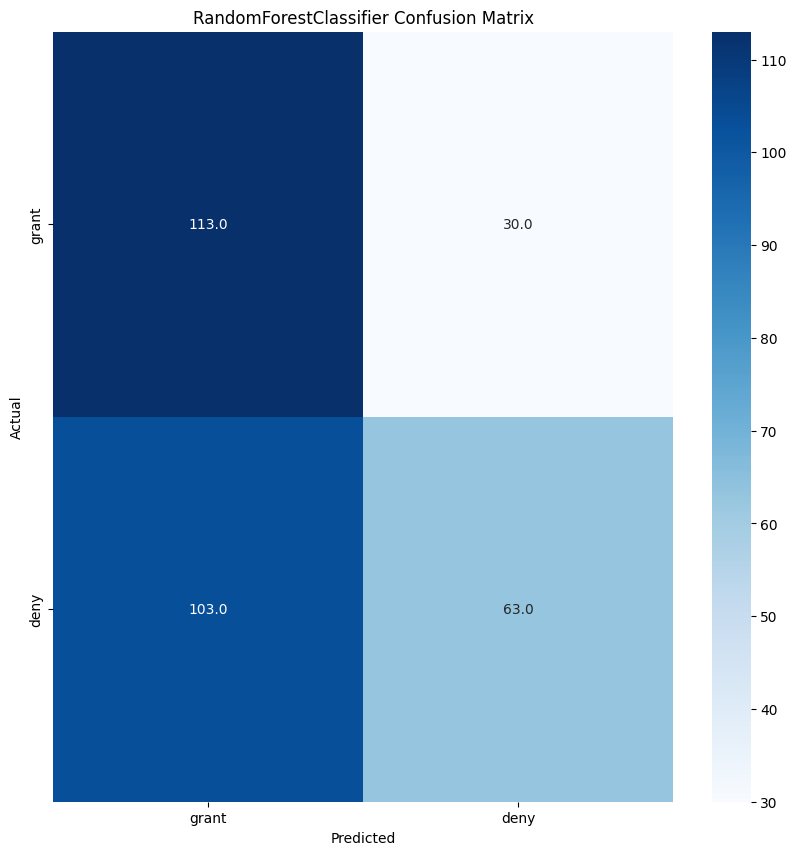

array([[113,  30],
       [103,  63]])

In [156]:

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('RFT', RandomForestClassifier(n_estimators = 1500, criterion = "entropy", oob_score = True, max_features= 1)),
])

text_clf.fit(support_train_x, support_train_target)
predicted = text_clf.predict(support_test_x)
print(np.mean(predicted == support_test_target))
#print(f"probability: {text_clf.predict_proba(support_test_x)}")
confusion_plot(support_test_target, predicted, classes, labels=labels, normalize=False, title="RandomForestClassifier Confusion Matrix")


 accuracy 0.540453074433657


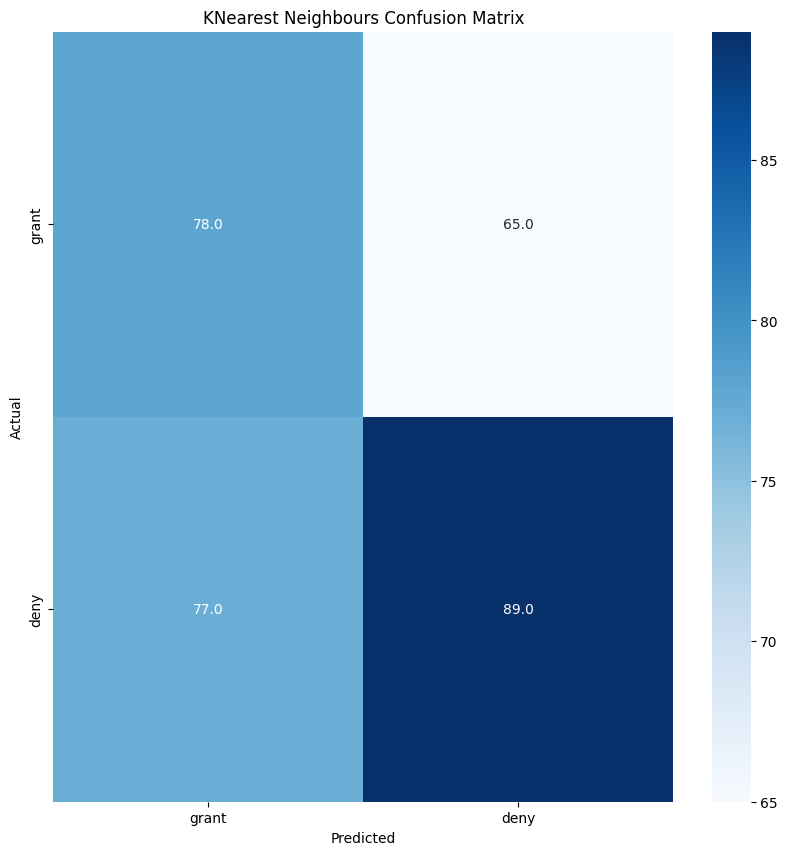

array([[78, 65],
       [77, 89]])

In [154]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('KNN', KNeighborsClassifier()),
])

text_clf.fit(support_train_x, support_train_target)
predicted = text_clf.predict(support_test_x)
print(f" accuracy {np.mean(predicted == support_test_target)}")
confusion_plot(support_test_target, predicted, classes, labels=labels, normalize=False, title="KNearest Neighbours Confusion Matrix")


### Embeddings

In [32]:

def getSingleBriefEmbeddings(brief_type, paired=paired):
    embeddings_map = list(map( lambda x: convert_to_numpy(x) , paired[brief_type].to_list()))
    outcome_map = paired['outcome'].to_list()
    data_type_map = paired['data_type'].to_list()  
    data =  [] 
    outcomes = []
    data_types = []

    for index,embeddings in enumerate(embeddings_map):
        outcome = outcome_map[index]
        data_type = data_type_map[index]
        for embedding in embeddings: 
            data.append(embedding)
            outcomes.append(outcome)
            data_types.append(data_type)
    return np.array(data) , np.array(outcomes , dtype=str) , np.array(data_types , dtype=str)

# convert string to Torch array

def convert_to_numpy(embedding):
    return np.array(ast.literal_eval(embedding))


In [45]:
support_mean_embeddings = getSingleBriefEmbeddings('support_mean_embeddings', df)
X, Y, data_types = support_mean_embeddings

In [49]:

train = data_types == 'train'
test = data_types == 'test'

support_train_x = X[train]
support_train_target = Y[train]
support_test_x = X[test]
support_test_target = Y[test]



In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf1 = SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)

clf2 = RandomForestClassifier(n_estimators = 1500, criterion = "entropy", oob_score = True, max_features= 1)

clf3 = KNeighborsClassifier()

clf4 = LogisticRegression(solver='liblinear')

clf5 = LinearSVC( random_state=42, tol=1e-5)


clf1.fit(support_train_x, support_train_target)
clf2.fit(support_train_x, support_train_target)
clf3.fit(support_train_x, support_train_target)
clf4.fit(support_train_x, support_train_target)
clf5.fit(support_train_x, support_train_target)


print(f"SGD: {clf1.score(support_test_x, support_test_target)}")
print(f"RFT: {clf2.score(support_test_x, support_test_target)}")
print(f"KNN: {clf3.score(support_test_x, support_test_target)}")
print(f"Logistic: {clf4.score(support_test_x, support_test_target)}")
print(f"LinearSVC: {clf5.score(support_test_x, support_test_target)}")



SGD: 0.5048543689320388
RFT: 0.5307443365695793
KNN: 0.5307443365695793
Logisti: 0.5469255663430421
LinearSVC: 0.5275080906148867


/Users/oluwaseuncardoso/Desktop/Projects/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [52]:
support_train_x[0]

array([ 2.91991832,  3.35592169, -0.84496191, ...,  0.19205808,
        3.00796133, -0.81398196])

In [55]:
print(clf1.score(support_train_x, support_train_target))

0.6043613707165109
